In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pypalettes import load_cmap
from highlight_text import fig_text, ax_text

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/R-graph-gallery/master/DATA/world.geojson"
world = gpd.read_file(url)
world = world[~world['name'].isin(["Antarctica"])]
df = pd.read_csv('data.csv')

def convert_lat_long(coord):
   try:
      if coord[-1] == 'N':
         return float(coord[:-2].replace(" ", "").replace("..", ".").replace("`", "").replace(",", "."))
      elif coord[-1] == 'S':
         return -float(coord[:-2].replace(" ", "").replace("..", ".").replace("`", "").replace(",", "."))
      elif coord[-1] == 'E':
         return float(coord[:-2].replace(" ", "").replace("..", ".").replace("`", "").replace(",", ".").replace(":", "."))
      elif coord[-1] == 'W':
         return -float(coord[:-2].replace(" ", "").replace("..", ".").replace("`", "").replace(",", "."))
   except:
      print(coord)
      return None
df['Latitude'] = df['Latitude'].apply(convert_lat_long)
df['Longitude'] = df['Longitude'].apply(convert_lat_long)

df = df[df['Latitude'].abs() <= 90]
df = df[df['Longitude'].abs() <= 180]
df = df[df['Magnitude'] <= 10]

def get_year(date):
   return date[-4:]
df['year'] = df['Date'].apply(get_year)

df.sample(10)

2.7.37 N


,Date,Time (utc),Region,Magnitude,Depth (km),Latitude,Longitude,Mode,Map,year
4192,22/04/2022,11:05:34,"Hindu Kush Region,Afghanistan",5.0,123,36.54,70.27,M,-,2022
13150,19/12/2016,10:57:34,"Tajikistan_Xinjiang, China Bordr Region.",4.5,11,39.09,73.84,M,-,2016
2839,18/10/2023,12:02:22,Afghanistan-Tajikistan Border Region,4.1,120,37.11,71.61,M,-,2023
4951,01/01/2021,01:50:22,"Hindu Kush Region, Afghanistan",4.0,150,36.34,69.82,M,-,2021
9162,30/10/2018,03:00:00,Ionian Sea.,5.5,10,37.56,20.75,A,-,2018
1952,01/01/2024,09:08:24,"Near West Coast of Honshu, Japan",5.4,42,37.55,137.38,A,-,2024
10537,07/05/2018,14:01:02,Afghanistan-Tajikistan Border Region,4.2,130,37.27,71.80,M,-,2018
3733,18/02/2023,22:02:15,"Hindu Kush Region,Afghanistan",3.4,121,36.36,70.93,M,-,2023
10917,17/03/2018,21:36:50,Southeastern Afghanistan (177 km NW of Quetta),3.4,68,31.60,65.90,M,-,2018
8168,07/02/2019,13:57:15,Southeastern Afghanistan,3.8,14,34.72,68.58,M,-,2019


In [72]:
df.sort_values('Magnitude', ascending=False)

,Date,Time (utc),Region,Magnitude,Depth (km),Latitude,Longitude,Mode,Map,year
1206,04/03/2024,06:55:07,"Southern Sumatra, Indonesia",10.0,4,-5.11,102.40,A,-,2024
4866,13/02/2021,04:34:31,Southern Iran,10.0,3,25.21,61.94,M,-,2021
9828,19/08/2018,00:19:37,Fiji Islands Region,8.2,558,-18.10,-178.10,A,-,2018
11839,08/09/2017,04:49:16,"Near Coast of Chiapas, Mexico",8.0,35,14.96,-93.90,M,-,2017
13273,08/12/2016,17:38:51,Solomon Islands,8.0,30,-10.80,161.40,A,-,2016
...,...,...,...,...,...,...,...,...,...,...
13921,01/10/2016,17:46:13,30 KM West of NARAN,1.4,18,34.90,73.34,M,-,2016
12900,19/01/2017,05:10:26,Near karachi,1.3,0,24.93,67.07,M,-,2017
13685,25/10/2016,20:12:56,23 km SE of Allai KP,1.2,35,34.60,73.30,M,-,2016
13068,28/12/2016,17:04:50,Northwestern Kashmir,1.0,35,35.06,73.36,M,-,2016


In [2]:
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties

# !!! change it to your path
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'Urbanist-Medium.ttf'
font = FontProperties(fname=font_path)
font_path = personal_path + 'Urbanist-Black.ttf'
bold_font = FontProperties(fname=font_path)

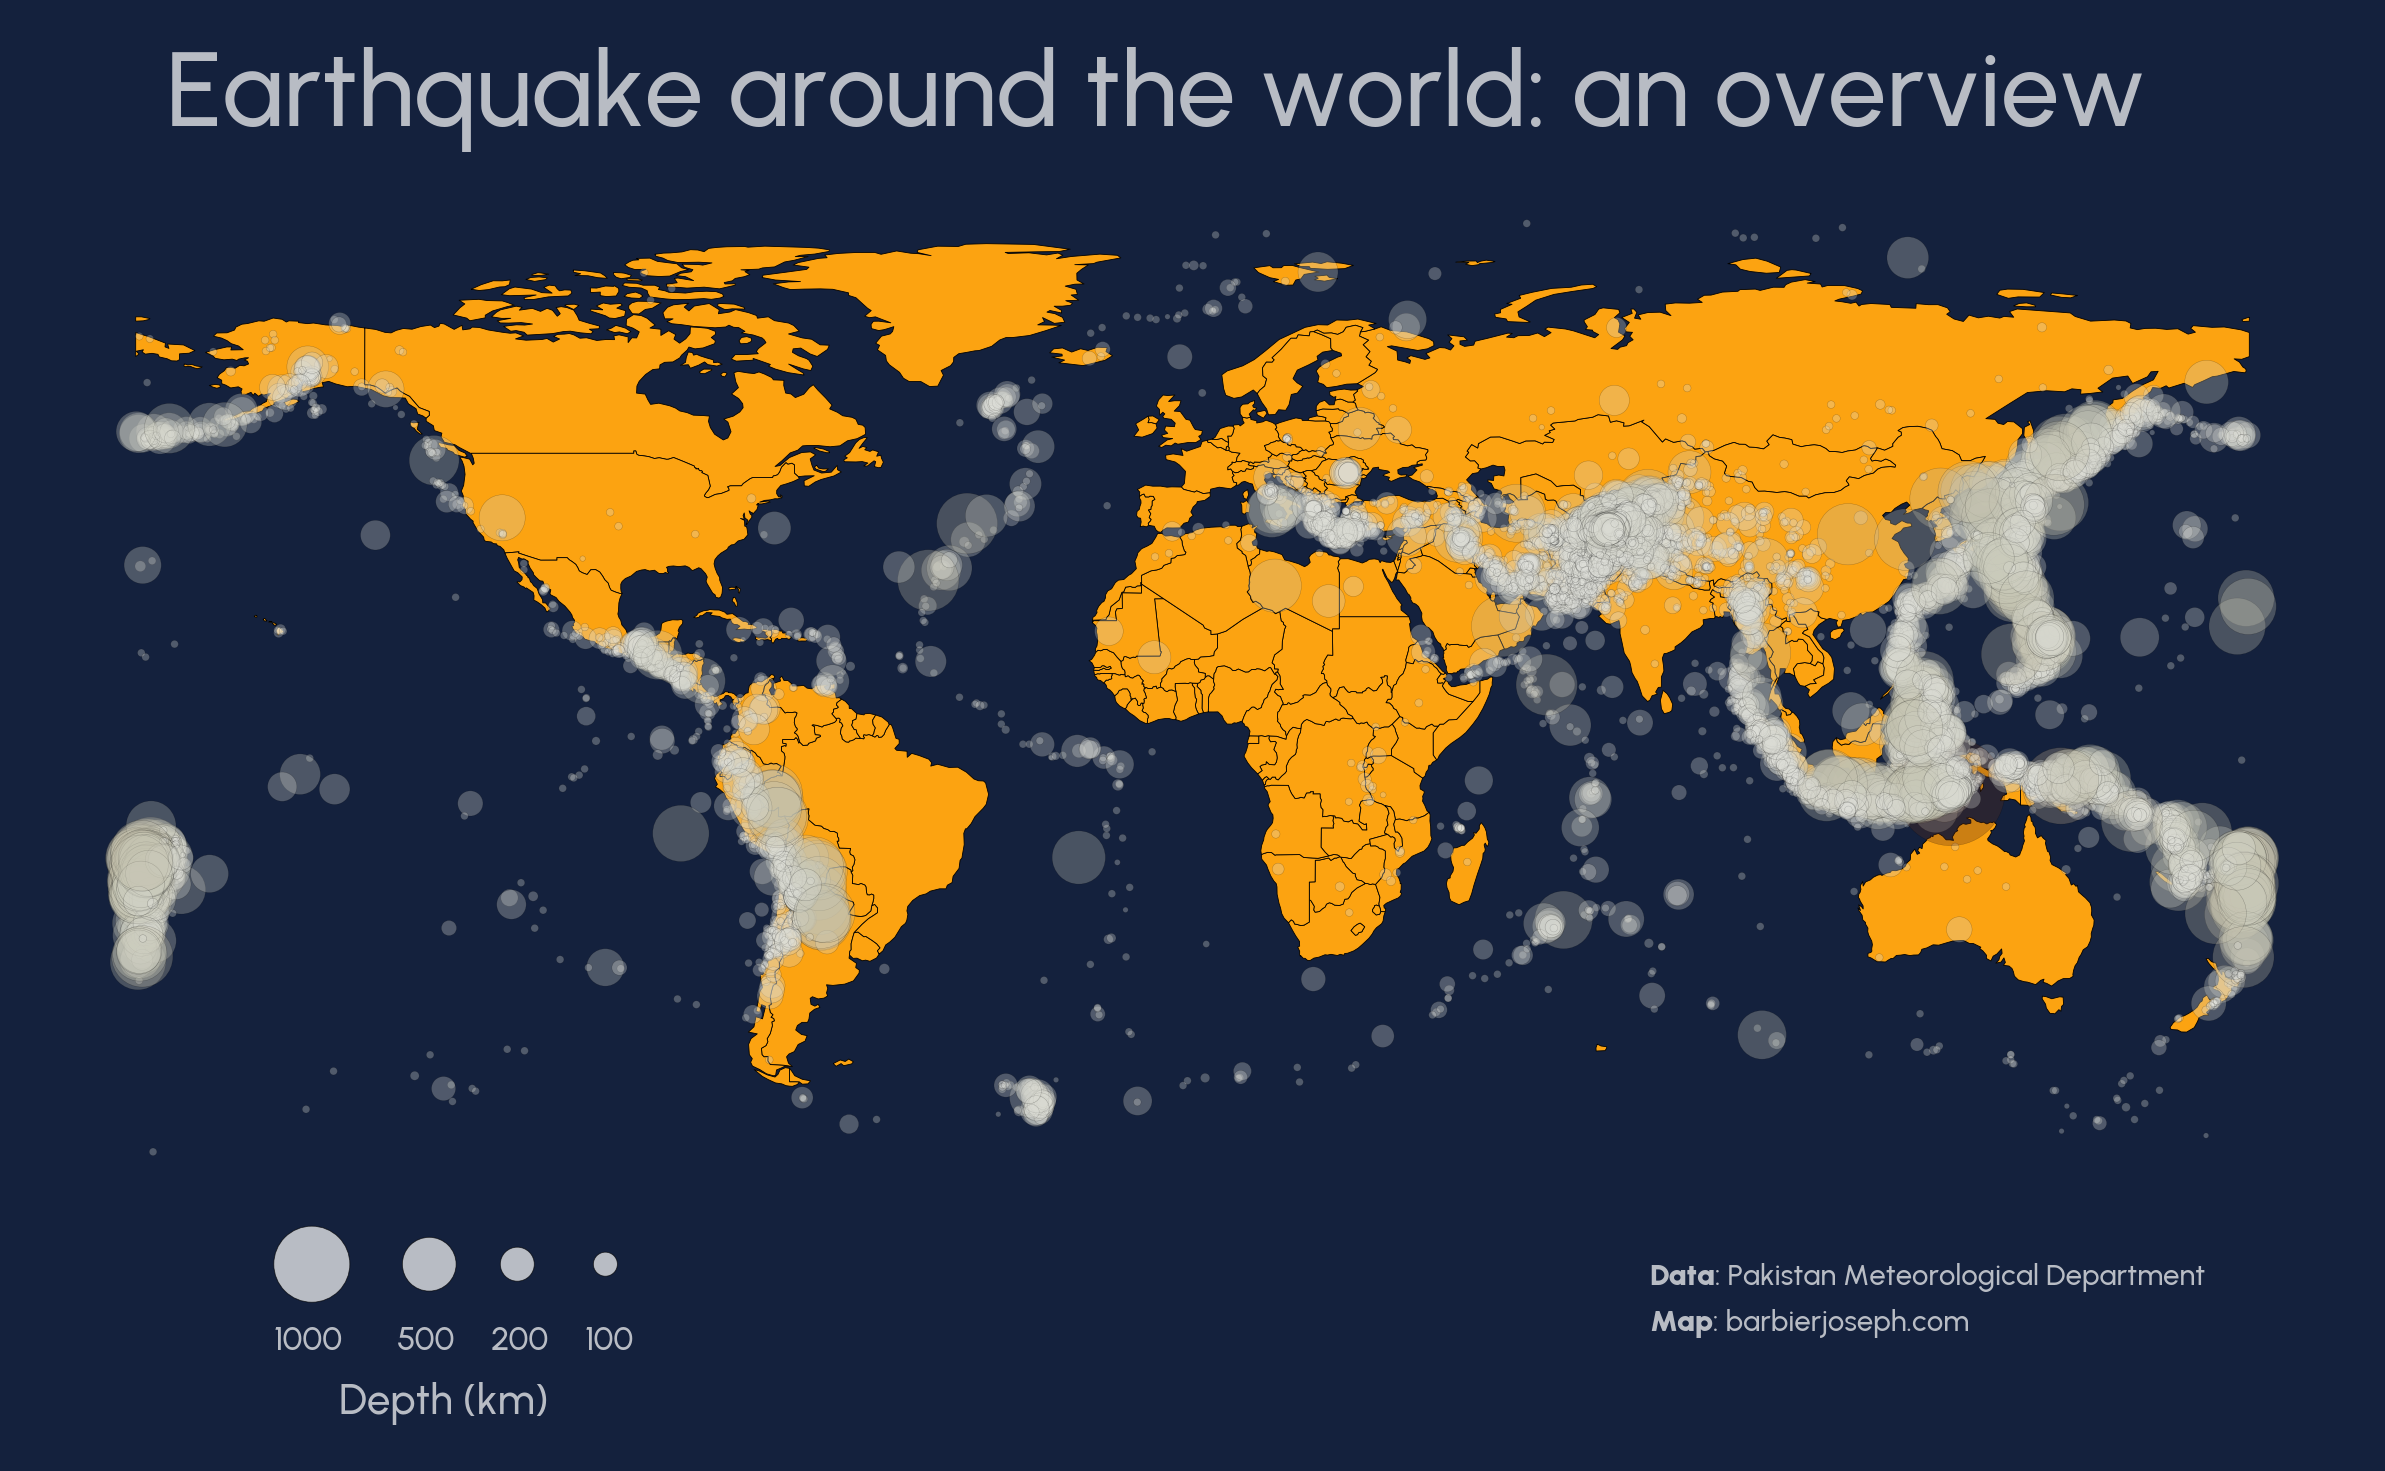

In [97]:


# colors
background_color = '#14213d'
map_color = '#fca311'
map_edgecolor = 'black'
text_color = 'white'
alpha_text = 0.7
cmap = load_cmap("Esox_lucius", type='continuous')

# initialize the figure
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.set_axis_off()

# background map
world.plot(ax=ax, color=map_color, edgecolor=map_edgecolor, linewidth=0.2)

# bubble on top of the map
ax.scatter(
   df['Longitude'],
   df['Latitude'],
   s=df['Depth (km)']/3,
   c=df['Depth (km)'],
   edgecolor='black',
   cmap=cmap,
   linewidth=0.1,
   alpha=0.3,
   zorder=10
)

# title
fig_text(
   x=0.5, y=0.96, s='Earthquake around the world: an overview',
   color=text_color, fontsize=25, ha='center', va='top', font=font,
   alpha=alpha_text
)

# credit
text = """
<Data>: Pakistan Meteorological Department
<Map>: barbierjoseph.com
"""
fig_text(
   x=0.85, y=0.16, s=text, color=text_color, fontsize=7, ha='right', va='top',
   font=font, highlight_textprops=[{'font': bold_font}, {'font': bold_font}],
   alpha=alpha_text
)

# legend
legend_data = pd.DataFrame({
   'long': [-150, -130, -115, -100],
   'lat': [-85]*4,
   'depth': [1000, 500, 200, 100]
})
ax.scatter(
   legend_data['long'],
   legend_data['lat'],
   s=legend_data['depth']/3,
   edgecolor='black',
   color='white',
   linewidth=0.2,
   alpha=0.7,
)
for i, (index, row) in enumerate(legend_data.iterrows()):
   x, y, value = row['long'], row['lat'], row['depth']
   ax_text(
      x=x-6.5+i, y=y-10, s=str(value),
      fontsize=8, font=font,
      color='white', alpha=alpha_text,
      ha='left', va='top'
   )
fig_text(
   x=0.228, y=0.07, s='Depth (km)', color=text_color, alpha=alpha_text, font=font
)

plt.savefig('map.png', dpi=300)
plt.show()